In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px #verileri görselleştirmek için


df = pd.read_csv("C:/Users/celli/Desktop/HEART_ATTACK_PROJECT/heart.csv")
df.head()  #ilk 5 satır görüntüler

In [ ]:
#Age : Hasta yaşı

#Sex : Cinsiyet

#exang: egzersize bağlı anjina (1 = evet; 0 = hayır)

#ca: number of major vessels (0-3)

#cp : göğüs acı tipi

#Value 1: tipik anjina
#Value 2: tipik olmayan anjina
#Value 3: anjinal olmayan acı değeri 4: asymptomatitrtbps : dinlenme kan basıncı (mm Hg)

#trtbps : dinlenme esnasındaki kan basıncı (in mm Hg)

#chol : BMI sensörü ile mg/dl cinsinden kolestoral

#fbs : (açlık kan şekeri > 120 mg/dl) (1 = doğru; 0 = yanlış)

#rest_ecg : istirahat elektrokardiyografik sonuçları

#Value 0: normal
#Value 1: ST-T dalga anormalliğine sahip olmak (T dalgası inversiyonları ve / veya ST yükselmesi veya 0.05 mV'luk > depresyonu)
#Value 2: Estes kriterlerine göre olası veya kesin sol ventrikül hipertrofisinin gösterilmesi
#thalach : elde edilen maksimum kalp atış hızı

#target : 0= daha az kalp krizi şansı 1= daha fazla kalp krizi şansı

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
kategorik_sütunlar = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
sürekli_sütunlar = ["age","trtbps","chol","thalachh","oldpeak"]
hedef_sütun = ["output"]
print("Kategorik sütunlar : ", kategorik_sütunlar)
print("Sürekli sütunlar : ", sürekli_sütunlar)
print("Hedef veri :  ", hedef_sütun)

Kategorik sütunlar :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
Sürekli sütunlar :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
Hedef veri :   ['output']


In [7]:
df.describe() #tanımlayıcı istatistikler

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum() #eksik veri taraması

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
df[df.duplicated()] #tekrar eden veri kontrolü

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [13]:
df.drop_duplicates(keep='first',inplace=True) #duplike verileri kaldırmak

In [14]:
df.shape #veri setinin yeni şekli

(302, 14)

In [15]:
df['age'].value_counts() #hangi yaş gurubundan kaç kişi var 

58    19
57    17
54    16
59    14
52    13
51    12
62    11
56    11
44    11
60    11
41    10
64    10
67     9
63     9
43     8
55     8
42     8
61     8
65     8
53     8
45     8
50     7
48     7
46     7
66     7
47     5
49     5
70     4
39     4
68     4
35     4
71     3
40     3
69     3
34     2
37     2
38     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [16]:
df['sex'].value_counts() #hangi cinsiyetten kaç kişi var (0-Kadın,1-Erkek)

1    206
0     96
Name: sex, dtype: int64

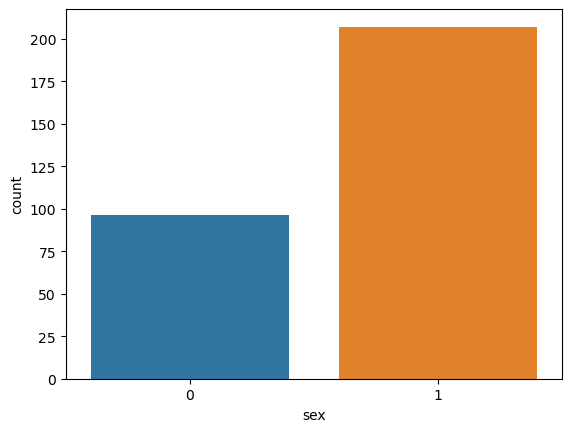

In [26]:
x=(df.sex.value_counts()) #erkek ve kadın sayısını gösteren grafik
p = sns.countplot(data=df, x="sex")
plt.show()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


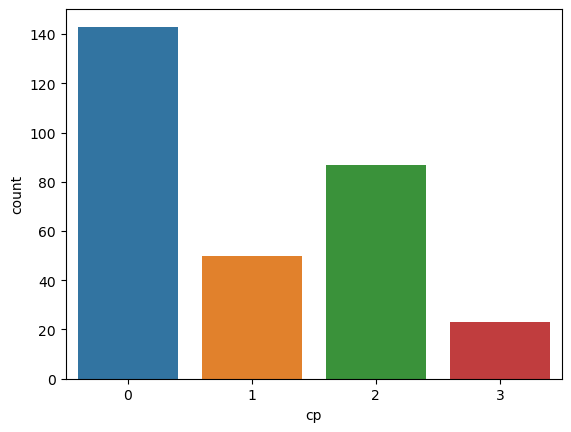

In [37]:
x=(df.cp.value_counts()) #göğüs acı tiplerinin sayısını gösteren grafik
print(x)
p = sns.countplot(data=df, x="cp")
plt.show()

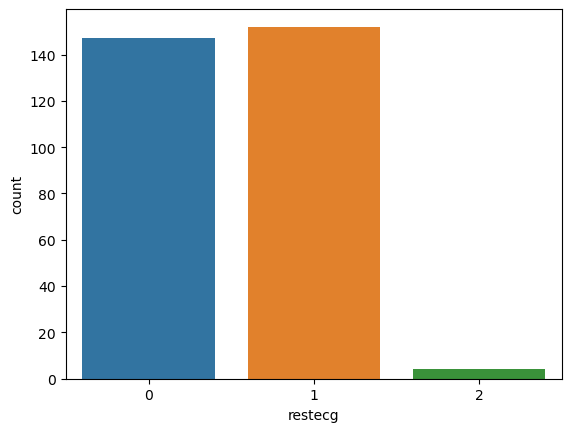

In [28]:
x=(df.restecg.value_counts()) #açlık kan şekeri değerlerini gösteren grafik
p = sns.countplot(data=df, x="restecg")
plt.show()

<Figure size 1000x1000 with 0 Axes>

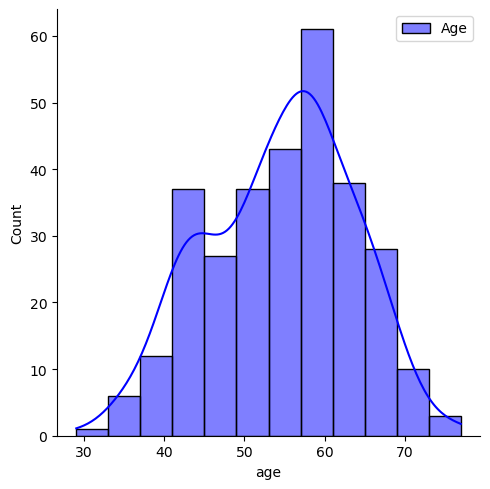

In [34]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color="blue", label="Age", kde= True)
plt.legend() #Legend: Grafiklerin hangi değişkenlere ait olduklarını gösterir

<Figure size 1000x1000 with 0 Axes>

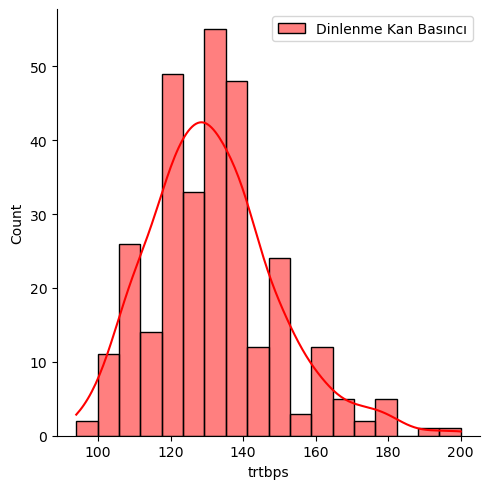

In [33]:
plt.figure(figsize=(10,10)) #Dinlenme kan basıncını gösteren grafik
sns.displot(df.trtbps , color="red", label="Dinlenme Kan Basıncı", kde= True)
plt.legend()


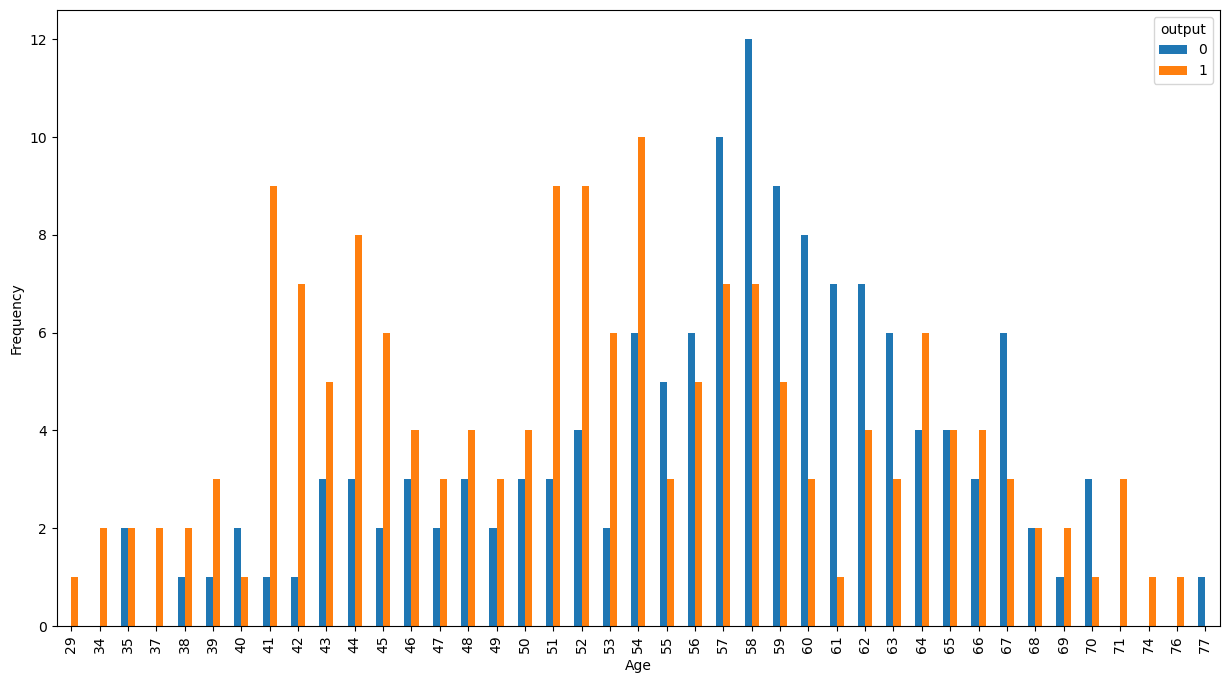

In [63]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(15,8)) #yaş sıklıklarını gösteren grafik
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


(-1.121028663804835,
 1.1430791922729766,
 -1.1507975514177002,
 1.1024189310198904)

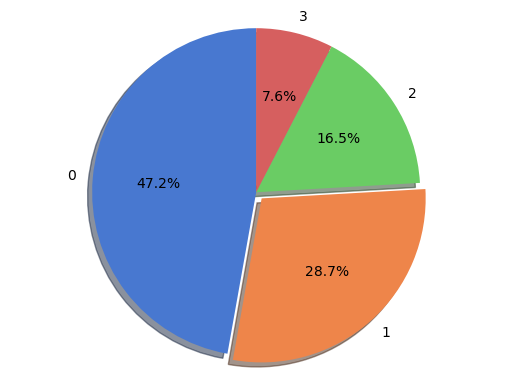

In [38]:
txtlabels='0','1','2','3' #göğüs acı tiplerinin sayısının pasta grafiği ile gösterimi
fractions=[143,87,50,23]
offsets=(0,0.05,0,0)
plt.pie(fractions,explode=offsets,labels=txtlabels,autopct='%1.1f%%',shadow=True,startangle=90,colors=sns.color_palette('muted'))
plt.axis('equal')

<Figure size 3000x3000 with 0 Axes>

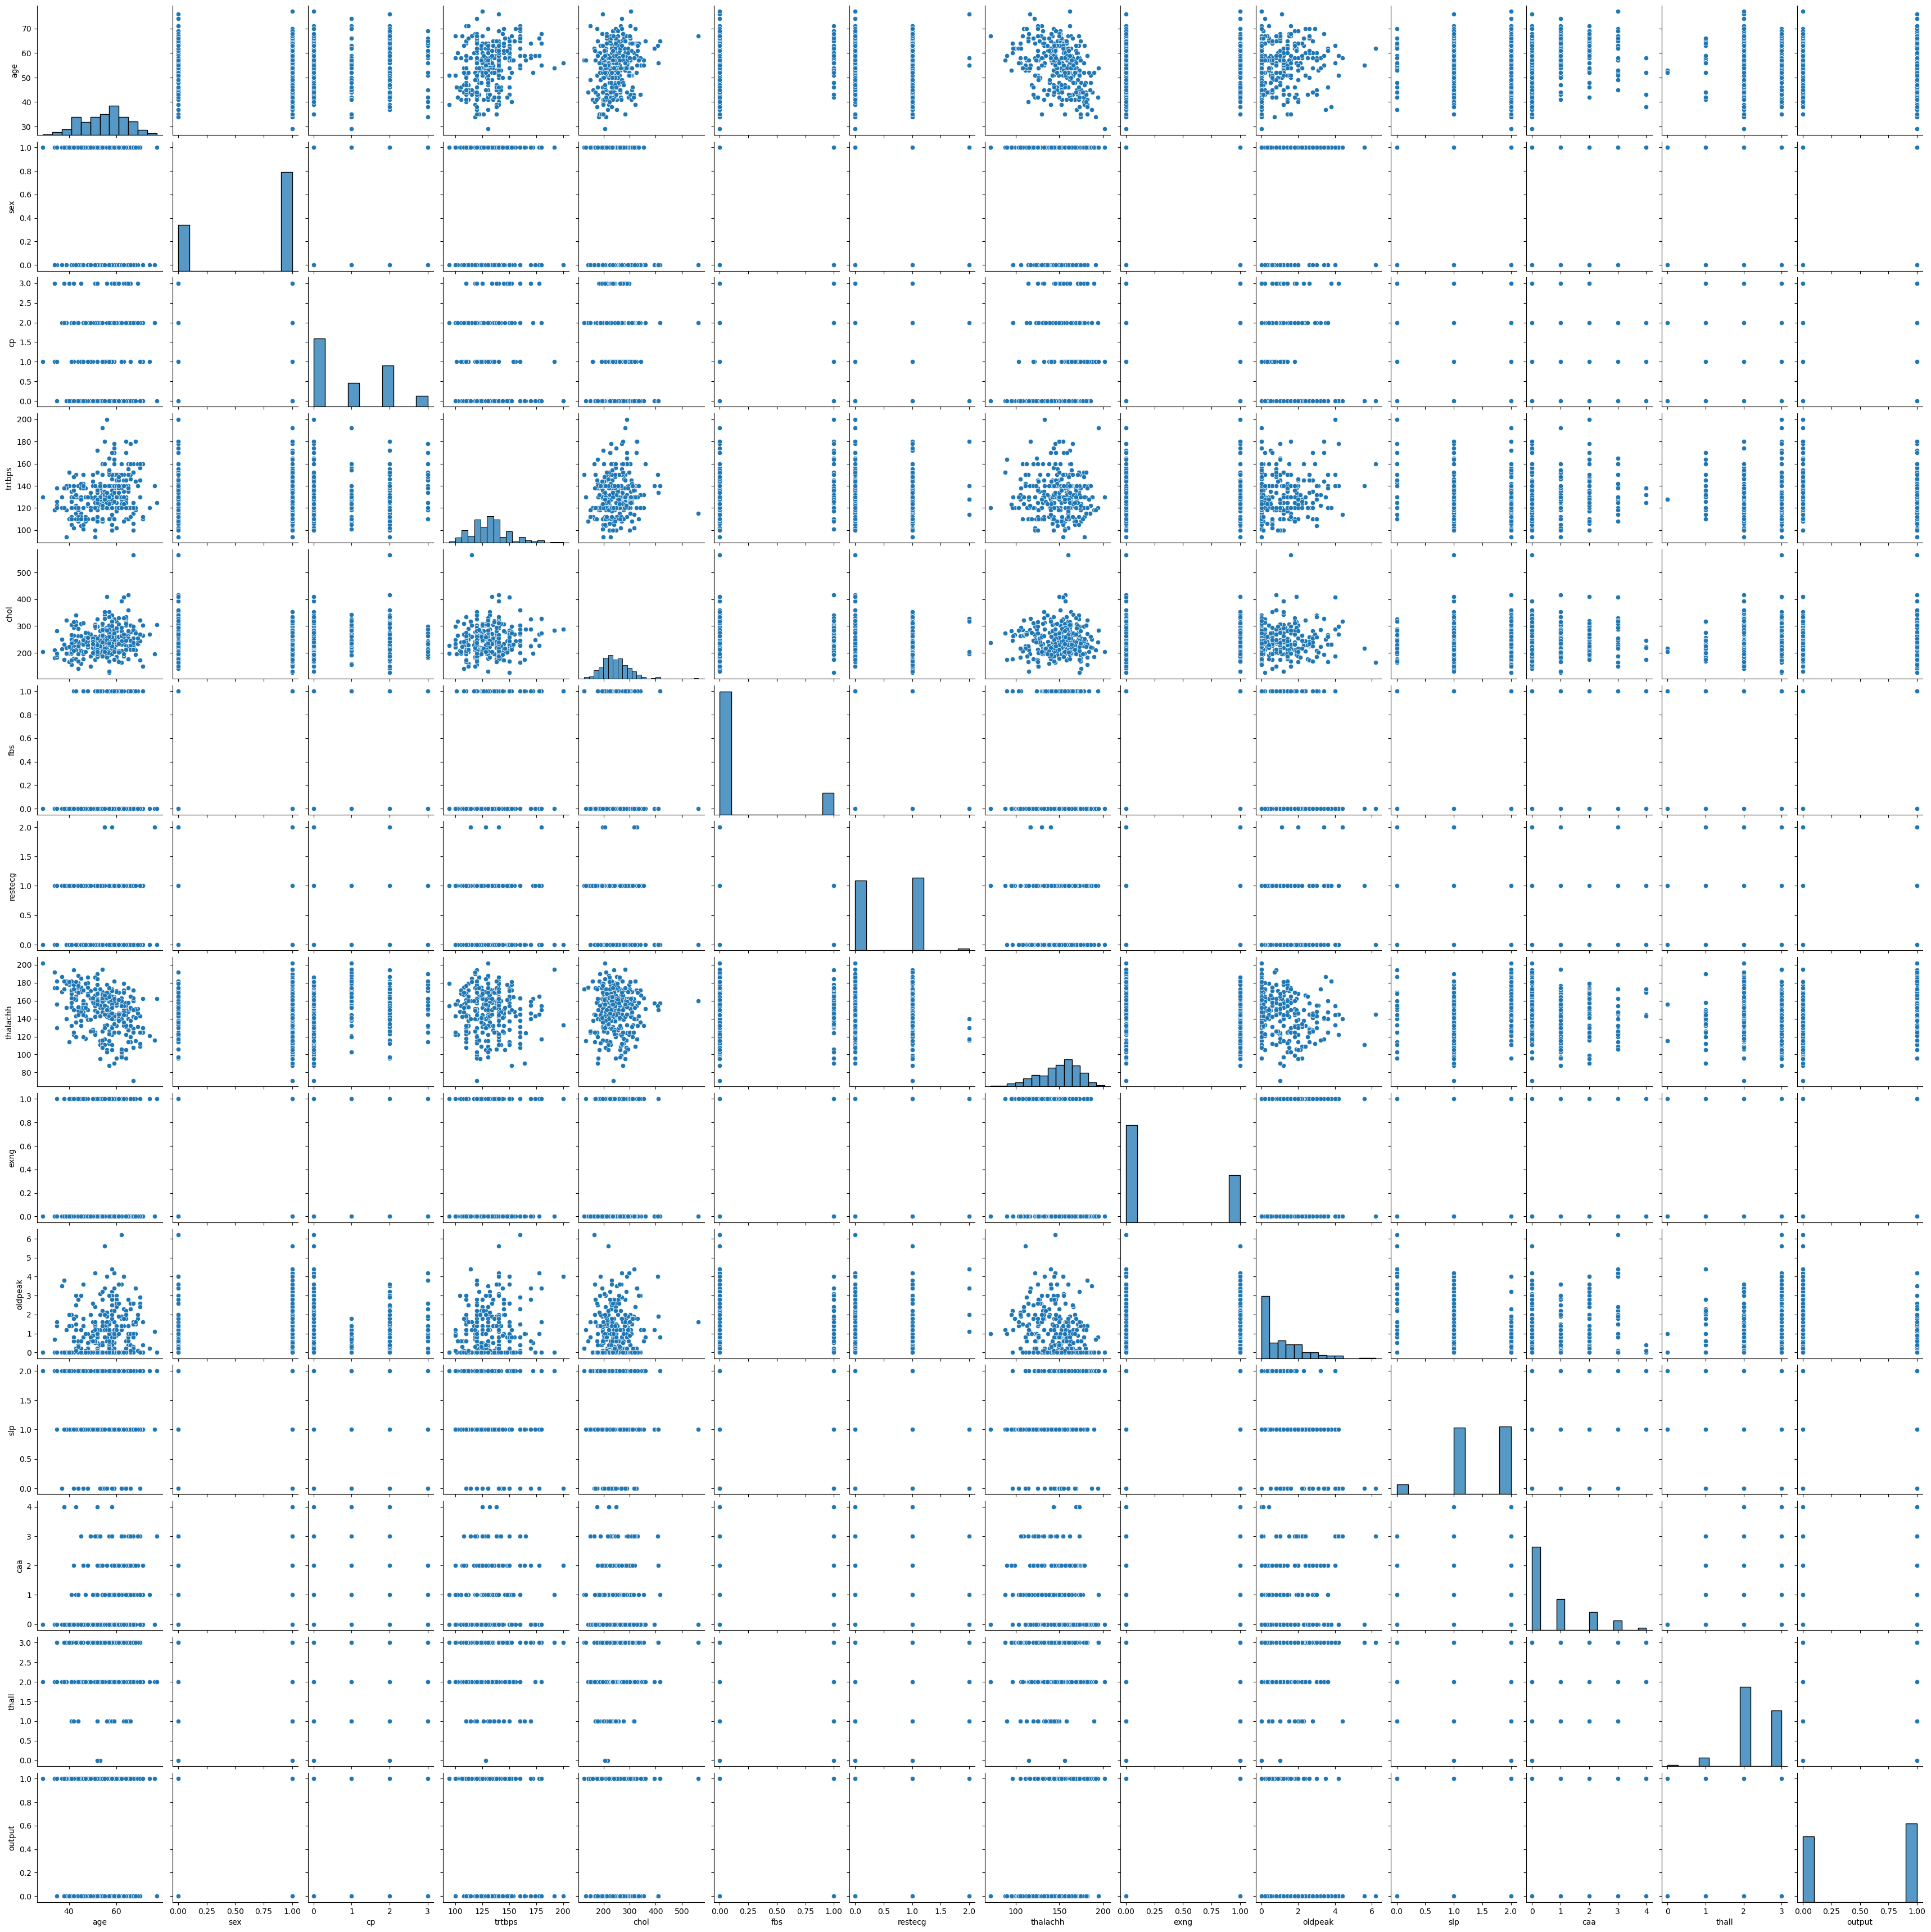

In [61]:
plt.figure(figsize=(30,30)) #değişkenlerin birbirleri arasındaki ilişkiyi gösteren grafikler
sns.pairplot(df)
plt.show()


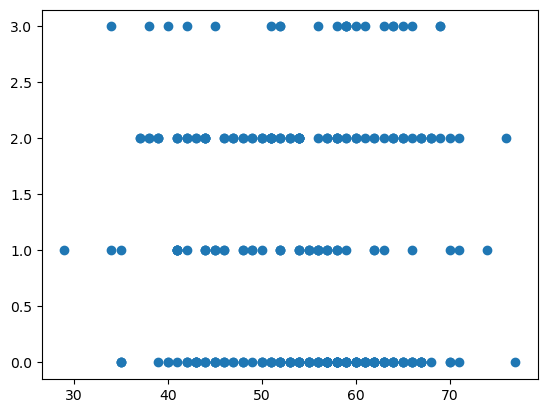

In [57]:
X=df['age'] #yaş ve göğüs ağrısı arasındaki ilişkiyi gösteren saçılım grafiği
y = df['cp']
plt.scatter(X, y)
plt.show()

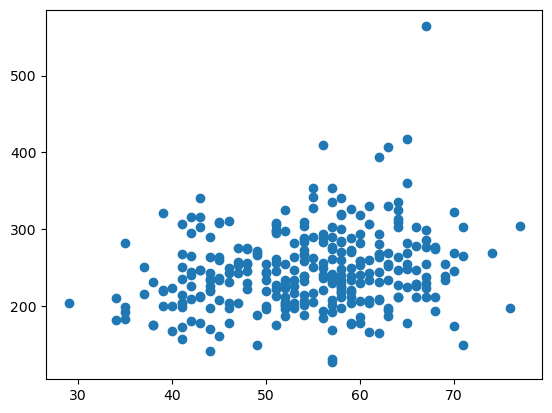

In [58]:
X=df['age'] #yaş ve kolestrol arasındaki ilişkiyi gösteren saçılım grafiği
y = df['chol']
plt.scatter(X, y)
plt.show()

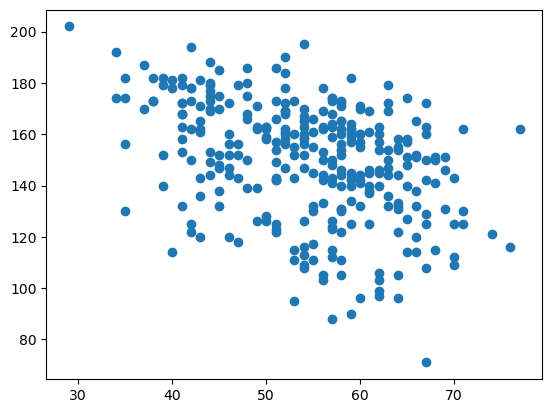

In [64]:
X=df['age'] #yaş ve maksimum kalp atış hızı arasındaki ilişkiyi gösteren saçılım grafiği
y = df['thalachh']
plt.scatter(X, y)
plt.show()

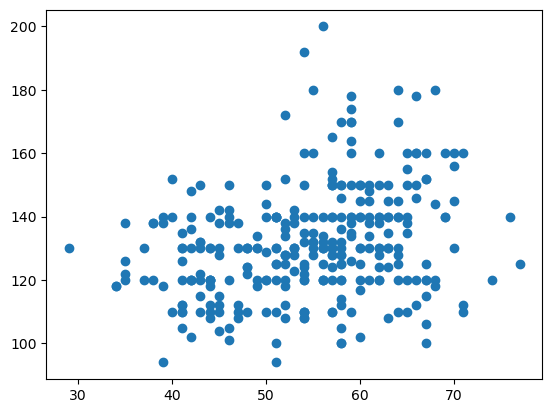

In [67]:
X=df['age'] #yaş ve dinlenme esnasındaki kan basıncı arasındaki ilişkiyi gösteren saçılım grafiği
y = df['trtbps']
plt.scatter(X, y)
plt.show()

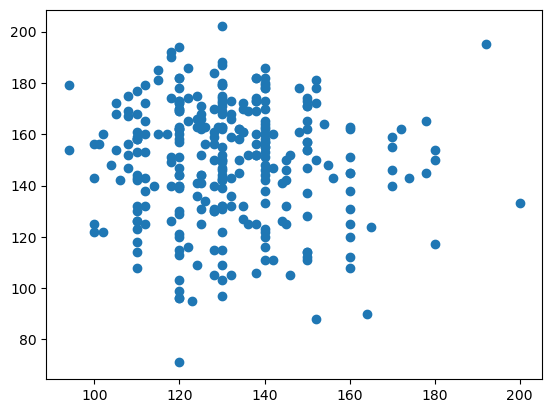

In [68]:
X=df['trtbps'] #dinlenme esnasındaki kan basıncı ile maksimum kalp atış hızı arasındaki ilişkiyi gösteren saçılım grafiği
y = df['thalachh']
plt.scatter(X, y)
plt.show()

In [69]:
korelasyon=df.corr(method="pearson") #değişkenler arası ilişkiyi gözlemlemek için  kullanılan korelasyon tablosu 
korelasyon

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

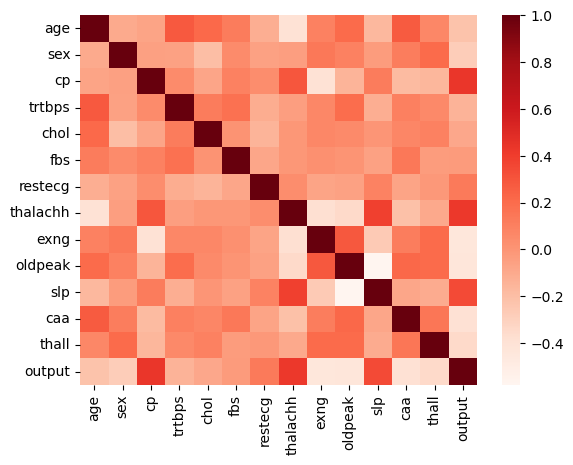

In [78]:
sns.heatmap(korelasyon,xticklabels=korelasyon.columns,yticklabels=korelasyon.columns,cmap="Reds") #korelasyon ısı haritası

In [43]:
#Sınıflandırma problemleri için genellikle kullanılan algoritmalar arasında Decision Tree, Random Forest,
# K-Nearest Neighbors (KNN), Support Vector Machines (SVM) ve Logistic Regression bulunur.Bu sebeple bahsedilen yöntemlerin,
#hangisinin bu veri seti için daha doğru çalıştığını görmek adına hepsini tek tek denedim.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Veri setini yükleme
df = pd.read_csv("C:/Users/celli/Desktop/HEART_ATTACK_PROJECT/heart.csv")


# Hedef değişkeni ve özellikleri belirleme
X = df.drop('output', axis=1)
y = df['output']

# Veri setini eğitim ve test setleri olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree sınıflandırıcı modelini tanımlama ve eğitme
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


# Tahmin yapma
y_pred = clf.predict(X_test)

# Modelin performansını test etme

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.7540983606557377


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri setini yükleme
df = pd.read_csv("C:/Users/celli/Desktop/HEART_ATTACK_PROJECT/heart.csv")

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tanımlama ve eğitim
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf.predict(X_test)

# Model performansını değerlendirme
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8524590163934426


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri setini yükleme
df = pd.read_csv("C:/Users/Talha SAĞIR/Desktop/heart.csv")

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tanımlama ve eğitim
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Tahmin yapma
y_pred = lr.predict(X_test)

# Model performansını değerlendirme
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8852459016393442


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri setini yükleme
df = pd.read_csv("C:/Users/Talha SAĞIR/Desktop/heart.csv")

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tanımlama ve eğitim
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Tahmin yapma
y_pred = knn.predict(X_test)

# Model performansını değerlendirme
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)



Accuracy: 0.6885245901639344


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Veri setini yükleme
df = pd.read_csv("C:/Users/celli/Desktop/HEART_ATTACK_PROJECT/heart.csv")

# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli tanımlama ve eğitim
svm = SVC()

svm.fit(X_train, y_train)

# Tahmin yapma
y_pred = svm.predict(X_test)

# Model performansını değerlendirme
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7049180327868853


In [ ]:
#Yukarıda her bir modelin en altında yer alan Accuracy değerlerine baktığımda Lojistik Regresyon Algoritmasının bu veri seti
#için en uygun algoritma olduğunu gördüm.